### Make figure 1


In [1]:
import os
import sys
sys.path.append("../") # go to parent dir
import glob
import time
import pathlib
import logging
import numpy as np
from scipy.sparse import linalg as spla
from dedalus.tools.config import config
from simple_sphere import SimpleSphere, TensorField, TensorSystem
import equations
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
from dedalus.extras import plot_tools
import logging
from mpl_toolkits import mplot3d


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
plt.rc('text', usetex=True)


/Users/Rohit/anaconda3/envs/dedalus/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


/Users/Rohit/anaconda3/envs/dedalus/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


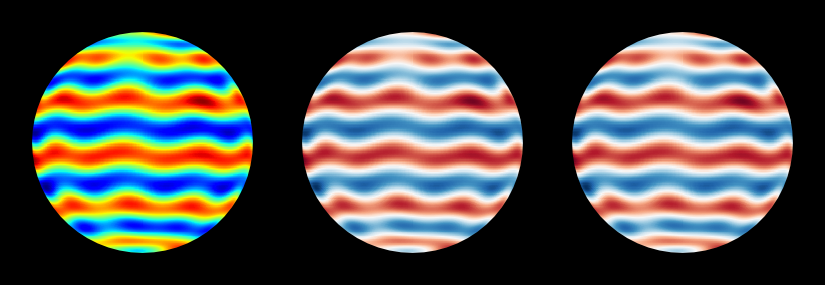

In [3]:
#add path to data folder
input_folder = "/Users/Rohit/Documents/research/active_matter_spheres/scripts/data/sphere3"
output_folder = "/Users/Rohit/Documents/research/active_matter_spheres/scripts/garbage"
dpi=300

ind = 500

with np.load(os.path.join(input_folder, 'output_%i.npz' %(ind))) as file:
    phi = file['phi']
    theta = file['theta']
    L_max = len(theta)-1
    S_max = 4
    om = file['om']
    time = file['t'][0]


pos1 = [0.1, 0.1, 0.25, 0.8]
pos2 = [0.4, 0.1, 0.25, 0.8]
pos3 = [0.7, 0.1, 0.25, 0.8]


fig = plt.figure(figsize=(3,1), dpi=dpi, tight_layout=True)
plt.rc('font', size=5)

###################
proj = ccrs.Orthographic(central_longitude=0, central_latitude=0)
ax1 = plt.axes(pos1, projection=proj)
lon = phi * 180 / np.pi
lat = (np.pi/2 - theta) * 180 / np.pi
xmesh, ymesh = plot_tools.quad_mesh(lon, lat)

ax1.pcolormesh(xmesh, ymesh, om.T, cmap='jet', transform=ccrs.PlateCarree())
fig.set_facecolor((0, 0, 0))

###################
proj = ccrs.Orthographic(central_longitude=0, central_latitude=0)
ax2 = plt.axes(pos2, projection=proj)
lon = phi * 180 / np.pi
lat = (np.pi/2 - theta) * 180 / np.pi
xmesh, ymesh = plot_tools.quad_mesh(lon, lat)

ax2.pcolormesh(xmesh, ymesh, om.T, cmap='RdBu_r', transform=ccrs.PlateCarree())

###################
ax3 = plt.axes(pos3, projection=proj)
proj = ccrs.Orthographic(central_longitude=0, central_latitude=0)
ax2 = plt.axes(pos2, projection=proj)
lon = phi * 180 / np.pi
lat = (np.pi/2 - theta) * 180 / np.pi
xmesh, ymesh = plot_tools.quad_mesh(lon, lat)


ax3.pcolormesh(xmesh, ymesh, om.T, cmap='RdBu_r', transform=ccrs.PlateCarree())



In [37]:
from mayavi import mlab
mlab.init_notebook()
import numpy as np
from scipy.special import sph_harm

# Create a sphere
r = 0.3
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0:pi:101j, 0:2 * pi:101j]

x = r * sin(phi) * cos(theta)
y = r * sin(phi) * sin(theta)
z = r * cos(phi)

s = sph_harm(0, 10, theta, phi).real
mlab.figure(1, bgcolor=(0.5, 0.5, 0.5), fgcolor=(1, 1, 1), size=(400, 300))
mlab.clf()

m = mlab.mesh(x, y, z, scalars=s, colormap='jet')
m = mlab.mesh(x, y+0.8, z, scalars=s, colormap='jet')
m = mlab.mesh(x, y+1.6, z, scalars=s, colormap='jet')


mlab.view(0, 90, distance=3)

m

#mlab.show()

# Represent spherical harmonics on the surface of the sphere
#for n in range(1, 1):
#    for m in range(n):
#        s = sph_harm(m, n, theta, phi).real

#        mlab.mesh(x - m, y - n, z, scalars=s, colormap='jet')

#        s[s < 0] *= 0.97

#        s /= s.max()
#        mlab.mesh(s * x - m, s * y - n, s * z + 1.3,
#                  scalars=s, colormap='Spectral')

#mlab.view(90, 70, 6.2, (-1.3, -2.9, 0.25))
#mlab.show()

Notebook initialized with x3d backend.
